In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [88]:
# Test result path (CHANGE)
testPath = "C:\\Users\\jonat\\Documents\\Dataspread\\FormulaCompressionTest\\Jonathan\\VaryRowNum\\report\\PGImpl"

def getMetrics(path):
    """
    Takes in a path string to a .stat file and returns a Pandas DataFrame of the file's contents
    """
    reportsFile = open(path, 'r')
    dataDict = {}
    for line in reportsFile:
        if ': ' in line:
            metric, value = line.split(": ")
            if metric not in dataDict:
                dataDict[metric] = []
            try:
                dataDict[metric].append(int(value))
            except ValueError:
                dataDict[metric].append(float(value))
            except:
                dataDict[metric].append(value)
    reportsFile.close
    return pd.DataFrame(dataDict)


def getAllMetrics(basePath):
    """
    Takes in a file path and searches all of its subdirectories for .stat files and returns all of
    their contents in a Pandas DataFrame
    """
    data = pd.DataFrame()
    for file in os.listdir(basePath):
        filePath = os.path.join(basePath, file)
        if os.path.isdir(filePath):
            data = data.append(getAllMetrics(filePath))
        elif file == "core.stat":
            data = data.append(getMetrics(filePath))
    
    return data

def summarizeTest(testPath, 
                  x=["Number of cells to update"], 
                  y=['Total test time (ms)', 'Total time of getting dependents (ms)']):
    """
    Plots the test results given in testPath on the given x and y values
    """
    testData = getAllMetrics(testPath)
    testData = testData.groupby(x).mean()
    testData.plot.bar(y = y, subplots=True, figsize=(12,8))
    plt.ylabel("Time in ms")
    plt.xlabel("Number of Updated Cells")

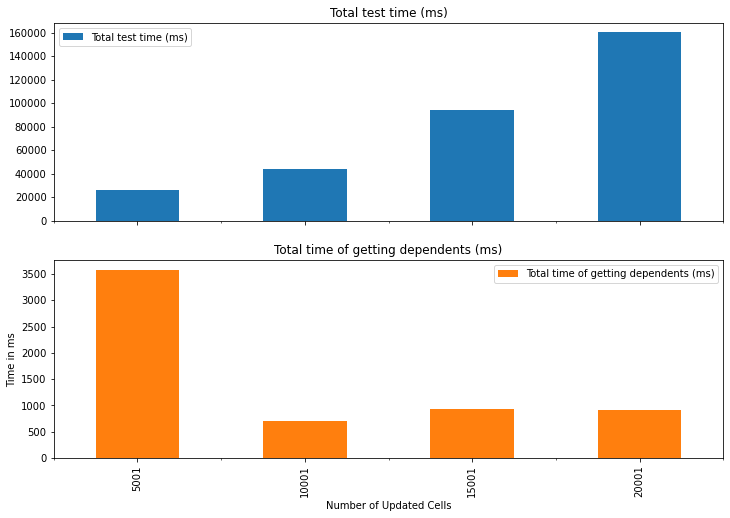

In [89]:
# use the helper function to plot
summarizeTest(testPath)